# Pandas Paired Programming Workshop

Hello new Fellows and welcome to Insight! We are going to begin with a workshop to hone your Pandas and exploratory data analysis (EDA) skillz. You should work on these questions and exercises in pairs. If both of you are having trouble, Google is your best friend! If you are still having problems, join a more experienced group and see if they can help. Good luck!
<br> <br>
Begin by downloading the Crunchbase dataset on start-up investments, which can be found [here](https://drive.google.com/file/d/1zsjN1tGWdXPb4wf4eTM62usMciSV-0sX/view).

**Exercise:**
The first thing we should do is import the Pandas library. It will probably be helpful to give this library an alias, too. Then, import the dataset and give it a name!

In [1]:
# Load useful packages
import seaborn as sns
from pandas import Series,DataFrame
import pandas as pd
import matplotlib as mpl
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')
print(alt.renderers.active)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

from scipy import sparse
import io


notebook


In [2]:
import pandas as pd
# load all csv's

dtype = {
    'company_permalink'              : 'str',
    'company_name'                   : 'str',
    'company_category_list'          : 'str',
    'company_market'                 : 'str',
    'company_country_code'           : 'str',
    'company_state_code'             : 'str',
    'company_region'                 : 'str',
    'company_city'                   : 'str',
    'investor_permalink'             : 'str',
    'investor_name'                  : 'str',
    'investor_category_list'         : 'str',
    'investor_market'                : 'str',
    'investor_country_code'          : 'str',
    'investor_state_code'            : 'str',
    'investor_region'                : 'str',
    'investor_city'                  : 'str',
    'funding_round_permalink'        : 'str',
    'funding_round_type'             : 'str',
    'funding_round_code'             : 'str',
    'funded_at'                      : 'str', # Convert to date format 1974-01-01
    'funded_month'                   : 'str', # format 1974-01
    'funded_quarter'                 : 'str', # format 1974-Q1
    'funded_year'                    : 'str', # format 1974
    'raised_amount_total_usd'        : 'str',
    'raised_amount_each'             : 'str',
}
raw_data = pd.read_csv('Crunchbase/Crunchbase_Startup_Investment_Data.csv',encoding='latin1',thousands=',', 
                            dtype=dtype, parse_dates=['funded_at','funded_month','funded_month','funded_quarter','funded_year'])


#raw_data = pd.read_csv('Crunchbase/Crunchbase_Startup_Investment_Data.csv',encoding='latin1')

Some of you may have experienced a problem already - thats ok! We can deal.
<br><br>
The problem here is that the dataset is encoded in Latin-1, but Pandas has defaulted to UTF-8 encoding. Bad, pandas! But it's ok, you can correct for this by specifying the encoding in your command. <br><br>
*Pro tip:* If you're having trouble, try Googling your error messages. You are probably not the first to encounter any particular error.

In [3]:
raw_data.dtypes

company_permalink                  object
company_name                       object
company_category_list              object
company_market                     object
company_country_code               object
company_state_code                 object
company_region                     object
company_city                       object
investor_permalink                 object
investor_name                      object
investor_category_list             object
investor_market                    object
investor_country_code              object
investor_state_code                object
investor_region                    object
investor_city                      object
funding_round_permalink            object
funding_round_type                 object
funding_round_code                 object
funded_at                  datetime64[ns]
funded_month               datetime64[ns]
funded_quarter             datetime64[ns]
funded_year                datetime64[ns]
raised_amount_total_usd           

In [4]:
raw_data.head(5)


,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_total_usd,raised_amount_each
0,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,NaN,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,...,NaN,/funding-round/14fe2864e02d0f15ddc3ec8eacdc8e1b,seed,NaN,1974-01-01,1974-01-01,1974-01-01,1974-01-01,NaN,-
1,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01-01,1979-01-01,1979-01-01,"1,000,000",#DIV/0!
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01-01,1979-01-01,1979-01-01,"1,000,000",#DIV/0!
3,/organization/ikro,Ikro,NaN,NaN,BRA,NaN,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,NaN,/funding-round/46c353a8249170cc4b6ab89a522fefdc,venture,A,1982-06-01,1982-06-01,1982-04-01,1982-01-01,"724,000",#DIV/0!
4,/organization/indelsul,Indelsul,NaN,NaN,NaN,NaN,NaN,NaN,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,NaN,/funding-round/48e8db0d90f95934831603622cb3f46a,venture,A,1982-12-01,1982-12-01,1982-10-01,1982-01-01,"165,000",#DIV/0!


Now that we have successfully imported the data, let's do some Exploratory Data Analysis! 

**Exercise:**<br>
Let's begin by displaying the first 5 rows of each column. <br>(*Hint: there is a special command for this!*)

**Question:**<br>
How many columns are in this dataset? How many rows?

**Exercise:**<br>
You'll probably notice that the command above actually truncates the number of columns it shows. This is to make display easier. However, we will definitely want to see each of the column names so that we know what kinds of data are available to us. Try pulling out all of the column names.

In [5]:
raw_data.columns

Index(['company_permalink', 'company_name', 'company_category_list',
       'company_market', 'company_country_code', 'company_state_code',
       'company_region', 'company_city', 'investor_permalink', 'investor_name',
       'investor_category_list', 'investor_market', 'investor_country_code',
       'investor_state_code', 'investor_region', 'investor_city',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'funded_month', 'funded_quarter', 'funded_year',
       'raised_amount_total_usd', 'raised_amount_each'],
      dtype='object')

**Question:**<br>
What are the data types in each column?

In [6]:
raw_data.dtypes

company_permalink                  object
company_name                       object
company_category_list              object
company_market                     object
company_country_code               object
company_state_code                 object
company_region                     object
company_city                       object
investor_permalink                 object
investor_name                      object
investor_category_list             object
investor_market                    object
investor_country_code              object
investor_state_code                object
investor_region                    object
investor_city                      object
funding_round_permalink            object
funding_round_type                 object
funding_round_code                 object
funded_at                  datetime64[ns]
funded_month               datetime64[ns]
funded_quarter             datetime64[ns]
funded_year                datetime64[ns]
raised_amount_total_usd           

One of the inevitable frustrations in working with large datasets is that they can be messy. Often, values can be missing. Values might be missing because they don't apply, or simply because they got lost in the shuffle (e.g. wasn't recorded, data was corrupted, etc.) Missing values can take different forms in different datasets - and sometimes even multiple forms! One typical form is NaN, which is an acronym for Not A Number. <br><br>
**Question:**<br>
How many NaN's appear in each column? How many total across columns?

In [7]:
raw_data.isna().sum()

company_permalink              0
company_name                   1
company_category_list       3263
company_market              3265
company_country_code        7359
company_state_code         35347
company_region              7359
company_city                8705
investor_permalink            66
investor_name                 66
investor_category_list     83998
investor_market            84050
investor_country_code      27984
investor_state_code        52231
investor_region            27984
investor_city              28498
funding_round_permalink        0
funding_round_type             0
funding_round_code         59836
funded_at                      0
funded_month                   0
funded_quarter                 0
funded_year                    0
raised_amount_total_usd    13351
raised_amount_each             0
dtype: int64

**Exercise:**<br>
Let's take a look at all the columns that pertain to the amounts of money each company has raised. How many columns are relevant? Can you pull them all out at once?

In [8]:
raw_data[['raised_amount_total_usd','raised_amount_each']]

,raised_amount_total_usd,raised_amount_each
0,NaN,-
1,"1,000,000",#DIV/0!
2,"1,000,000",#DIV/0!
3,"724,000",#DIV/0!
4,"165,000",#DIV/0!
5,"155,000",#DIV/0!
6,"94,000",#DIV/0!
7,NaN,-
8,NaN,-
9,"243,000",#DIV/0!


In [9]:
raw_data.raised_amount_each.value_counts()

#DIV/0!    101154
 -          13351
Name: raised_amount_each, dtype: int64


One of the first things that you should notice is that the column 'raised_amount_each' is completely useless. This kind of thing is another unfortunate consequence of large datasets - they can be messy, and sometimes data doesn't get filled in correctly. 

Luckily, there is another column that can help us out here. Let's take a look at 'raised_amount_total_usd'.

You've probably noticed that some rows contain numbers, while others contain NaN's.

**Question:**<br>
How many rows contain numbers?

In [10]:

raw_data['raised_amount_total_usd']=raw_data.raised_amount_total_usd.str.replace('-', 'NaN')
raw_data['raised_amount_total_usd']=raw_data.raised_amount_total_usd.str.replace(',', '')#.astype(float)
    
#raw_data['raised_amount_total_usd_fix'] 
#a = [ NaN if x.isna() else x for x in raw_data.raised_amount_total_usd.str.replace(',', '')]
#a = [ NaN if x=='nan' else float(x) for x in raw_data.raised_amount_total_usd.str.replace(',', '')]
#a = [ x for x in raw_data.raised_amount_total_usd.str.replace(',', '')]

In [11]:
# did I get the correct number of NaN's?  SHould be 13351... yup!
raw_data.raised_amount_total_usd.isna().sum()

13351

**Question:**<br>
How much money in total was raised across every company in this dataset?

In [12]:
raw_data['raised_amount_total_usd']=raw_data.raised_amount_total_usd.astype(float)


Did you get an error? Oh noooooo! Can you piece together what happened from the TypeError? What type of data appears in that column? What can you do to remedy it?

(*Hint: you'll need to convert these values, but this may be a 2-step process. You may need to remove certain elements first.*)

In [13]:
raw_data.raised_amount_total_usd.sum()

1280964574193.0

Ok, whew! Now that THAT'S done, we can return to our question.

**Question:**<br>
How much money in total was raised across every company in this dataset?

WOW! That's a lot of moola!! Does it make you want to start a business?? Let's pretend you said 'yes'. And, since you're no dummy, I'm sure you would do the appropriate market research before crafting a business model. 

**Question**:<br>
How many unique types of company markets are there? What are they?

In [14]:
len(raw_data.company_market.unique())

713

As I'm sure you've guessed, not all of these markets received an equal share of investment money. Let's try breaking investment down by different markets!

**Question:**<br>
How much money was invested in each company market?

(*Hint: You'll need to **group** the data **by** market type...*)

In [15]:
raised_mkt=raw_data.groupby('company_market').agg({'raised_amount_total_usd':'sum'}).sort_values('raised_amount_total_usd',ascending=False).reset_index()
raised_mkt.head(20)

,company_market,raised_amount_total_usd
0,Biotechnology,1.493952e+11
1,Software,8.670155e+10
2,Clean Technology,6.981941e+10
3,Health Care,6.005040e+10
4,E-Commerce,4.950532e+10
5,Mobile,4.221446e+10
6,Enterprise Software,4.218186e+10
7,Internet,3.778165e+10
8,Advertising,3.453942e+10
9,Semiconductors,3.405033e+10


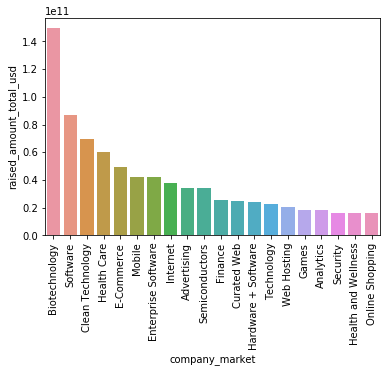

In [16]:
ax = sns.barplot(x='company_market',y='raised_amount_total_usd', data=raised_mkt[0:20])
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


It's good to know how much investment each market saw, but we need a bit more organization here. We don't want to build our startup in just ANY market, we want the HOTTEST market!

**Question:**<br>
Which company markets received the most investment money? Find the top 10.

In [17]:
print(raised_mkt[:10])


        company_market  raised_amount_total_usd
0        Biotechnology             1.493952e+11
1             Software             8.670155e+10
2     Clean Technology             6.981941e+10
3          Health Care             6.005040e+10
4           E-Commerce             4.950532e+10
5               Mobile             4.221446e+10
6  Enterprise Software             4.218186e+10
7             Internet             3.778165e+10
8          Advertising             3.453942e+10
9       Semiconductors             3.405033e+10


**Question:**<br>
Which company markets received no investment money? Can you find the bottom 3 markets to recieve at least SOME investment money (aka more than $0)?

In [18]:
raised_mkt[raised_mkt['raised_amount_total_usd']>0].tail(10)

,company_market,raised_amount_total_usd
685,Unmanned Air Systems,40000.0
686,Comics,40000.0
687,Intellectual Asset Management,39994.0
688,Clean Technology IT,38817.0
689,Veterinary,34623.0
690,CAD,28000.0
691,Motion Capture,25000.0
692,Home Owners,22000.0
693,Self Development,20000.0
694,Direct Sales,18000.0


Fantastic work! Now we know which company markets to avoid, and which to pursue. 

Next, we will want to narrow down WHERE to build our startup. After all, funding can change based on where our business is located!

**Question:**<br>
In which countries did startups in the top market recieve the most funding?

In [19]:
top_market = raised_mkt['company_market'][0] # this is already sorted
by_country = raw_data[raw_data['company_market']==top_market].groupby('company_country_code').agg({'raised_amount_total_usd':'sum'}).sort_values('raised_amount_total_usd',ascending=False).reset_index()
by_country.head(10)

,company_country_code,raised_amount_total_usd
0,USA,1.102387e+11
1,GBR,9.909928e+09
2,CHE,5.389536e+09
3,DEU,3.622760e+09
4,CAN,2.979867e+09
5,FRA,2.794888e+09
6,ISR,1.856898e+09
7,NLD,1.695295e+09
8,DNK,1.345052e+09
9,BEL,1.171411e+09


Woohoo! Go USA! But should we start our business in Maine? In Florida? In Washington state? Let's try narrowing it down even further.

**Question:**<br>
Which state of the top country in the top company market recieved the most investment funding?

In [20]:
by_country_state = raw_data[raw_data['company_market']==top_market].groupby(['company_country_code','company_state_code']).agg({'raised_amount_total_usd':'sum'}).sort_values('raised_amount_total_usd',ascending=False)
#print(by_country_state)
by_country_state.loc['USA',:].sort_values('raised_amount_total_usd',ascending=False).head(10)


,raised_amount_total_usd
company_state_code,
CA,5.374529e+10
MA,2.255470e+10
PA,5.153666e+09
NJ,3.147271e+09
TX,2.972928e+09
NC,2.967629e+09
CT,1.810388e+09
OH,1.638973e+09
MD,1.579667e+09


Great! Now let's zoom in even further! 

**Quesiton:**<br>
How about the cities in the top state?

In [21]:
by_country_state = raw_data[raw_data['company_market']==top_market].groupby(['company_country_code','company_state_code','company_city']).agg({'raised_amount_total_usd':'sum'}).sort_values('raised_amount_total_usd',ascending=False)
#print(by_country_state)
print(by_country_state.loc['USA','CA'].sort_values('raised_amount_total_usd',ascending=False).head(5))
print(by_country_state.loc['USA','CA'].sort_values('raised_amount_total_usd',ascending=False).tail(5))


                     raised_amount_total_usd
company_city                                
San Diego                       9.189710e+09
South San Francisco             5.948113e+09
San Francisco                   5.211797e+09
Menlo Park                      5.063562e+09
Redwood City                    4.244630e+09
              raised_amount_total_usd
company_city                         
Livermore                   1500000.0
Santa Ana                   1006102.0
Simi Valley                       0.0
Milpitas                          0.0
Del Mar                           0.0


/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


Are you surprised by the city? It turns out that our cofounder, Investra Q. McMoney, **hates** the hot weather. But maybe there are other cities that would be good candidates for our startup... 

**Question:**<br>
What are the top 5 cities in the USA for biotechnology company market investment funding?

In [22]:
by_city = raw_data[(raw_data['company_market']==top_market) & (raw_data['company_country_code']=='USA')].groupby(['company_state_code','company_city']).agg({'raised_amount_total_usd':'sum'}).sort_values('raised_amount_total_usd',ascending=False)
print(by_city.sort_values('raised_amount_total_usd',ascending=False).head(5))

                                        raised_amount_total_usd
company_state_code company_city                                
MA                 Cambridge                       1.174261e+10
CA                 San Diego                       9.189710e+09
                   South San Francisco             5.948113e+09
                   San Francisco                   5.211797e+09
                   Menlo Park                      5.063562e+09


Fantastic! Looks like we have at least a few locations to scout!

In the meantime, we should consider the sources of funding. With that in mind, let's turn our attention to investor markets.

**Question:**<br>
Which investor markets raised the most money?

In [23]:
by_investor = raw_data.groupby(['investor_market']).agg({'raised_amount_total_usd':'sum'}).sort_values('raised_amount_total_usd',ascending=False)
by_investor.head(5)

,raised_amount_total_usd
investor_market,
Venture Capital,1.057116e+11
Finance,8.841049e+10
Investment Management,3.523649e+10
Software,2.236290e+10
Health Care,1.492058e+10


Are you surprised? How do you interpret the difference between company market investment and investment market investment? Why wouldn't these numbers be the same? Interpreting these types of apparent mis-matches is super important, especially when it comes to generating actionable insights.

But we should go deeper here. Let's look at this data over time, shall we?

**Question:**<br>
What is the earliest year for which we have funding data?
What is the latest year?

In [24]:
raw_data['funded_year'].sort_values(ascending=True)[0]

Timestamp('1974-01-01 00:00:00')

In [25]:
raw_data['funded_year'].sort_values(ascending=True)[-1:]

114504   2014-01-01
Name: funded_year, dtype: datetime64[ns]

Let's take a look at how the investor market has changed over time. We don't want to get ourselves ensnared in a bubble!

**Question:**<br>
What investor market raised the most money in the earliest year for which we have data?

In [26]:
by_year_investor_market = raw_data.groupby(['funded_year','investor_market']).agg({'raised_amount_total_usd':'sum', 'funded_year':'count'}).rename(columns={'raised_amount_total_usd':'fund_sum', 'funded_year':'year_count'})
#sort_values('funded_year',ascending=True)
by_year_investor_market#.head(5)
#by_year_investor_market.loc['2014-01-01']
#by_year_investor_market.loc['Venture Capital','2014-01-01']

by_year_investor_market.loc['2014-01-01','Venture Capital']

fund_sum      2.525512e+10
year_count    1.557000e+03
Name: (2014-01-01 00:00:00, Venture Capital), dtype: float64

In [27]:
by_year_investor_market.reset_index

<bound method DataFrame.reset_index of                                              fund_sum  year_count
funded_year investor_market                                      
1984-01-01  Education                    0.000000e+00           1
1987-01-01  Venture Capital              2.500000e+06           1
            Video Games                  0.000000e+00           1
1989-01-01  Finance                      0.000000e+00           1
1990-01-01  Education                    1.755000e+07           1
            Legal                        1.755000e+07           1
            Venture Capital              1.755000e+07           2
1991-01-01  Finance                      0.000000e+00           3
1993-01-01  Finance                      0.000000e+00           2
1994-01-01  Finance                      3.400000e+05           3
            Hardware + Software          1.300000e+07           1
1995-01-01  Finance                      0.000000e+00           2
            Marketplaces             

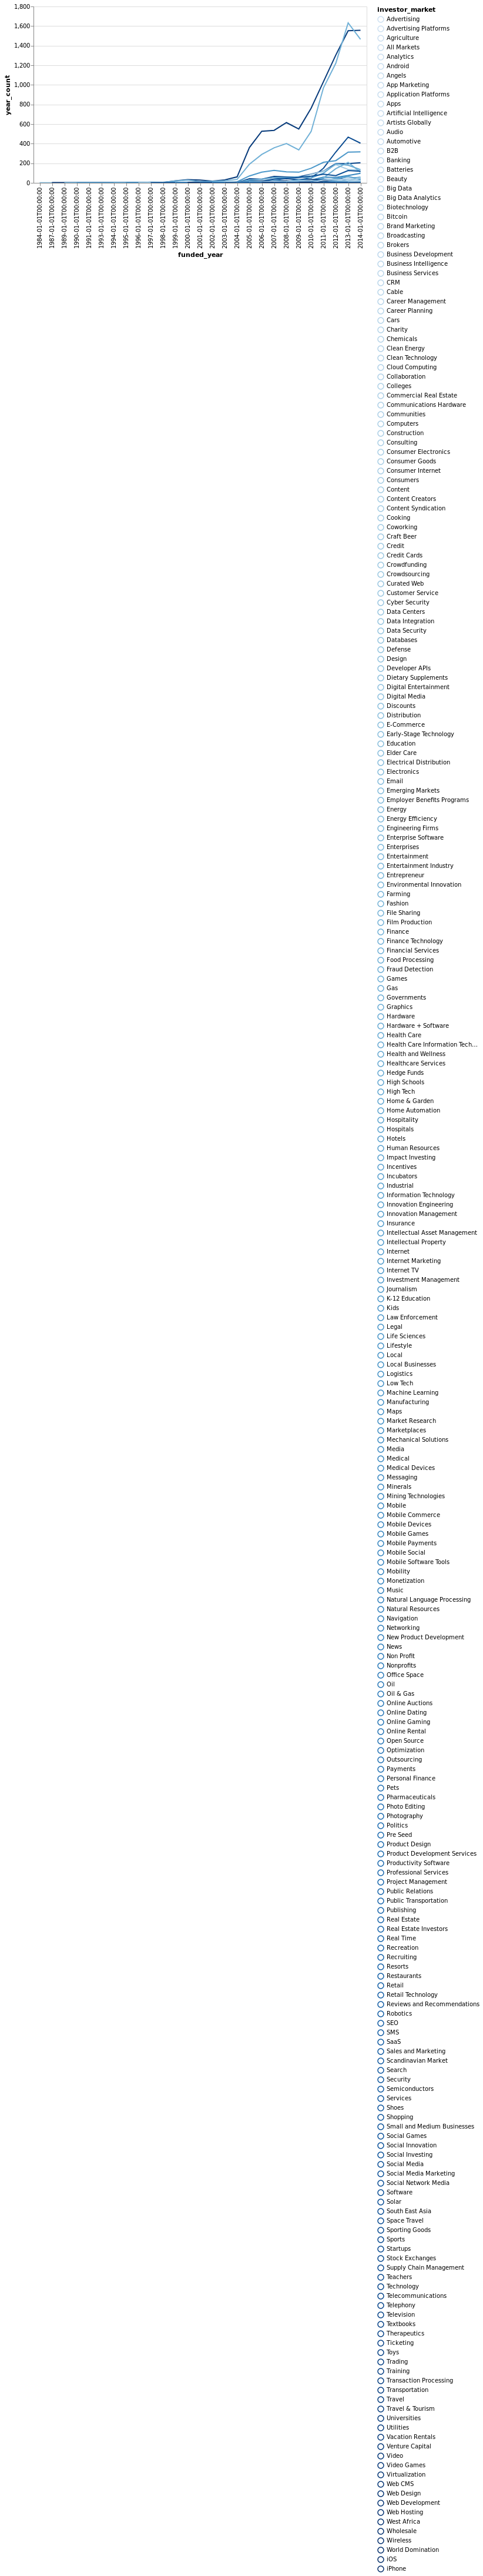

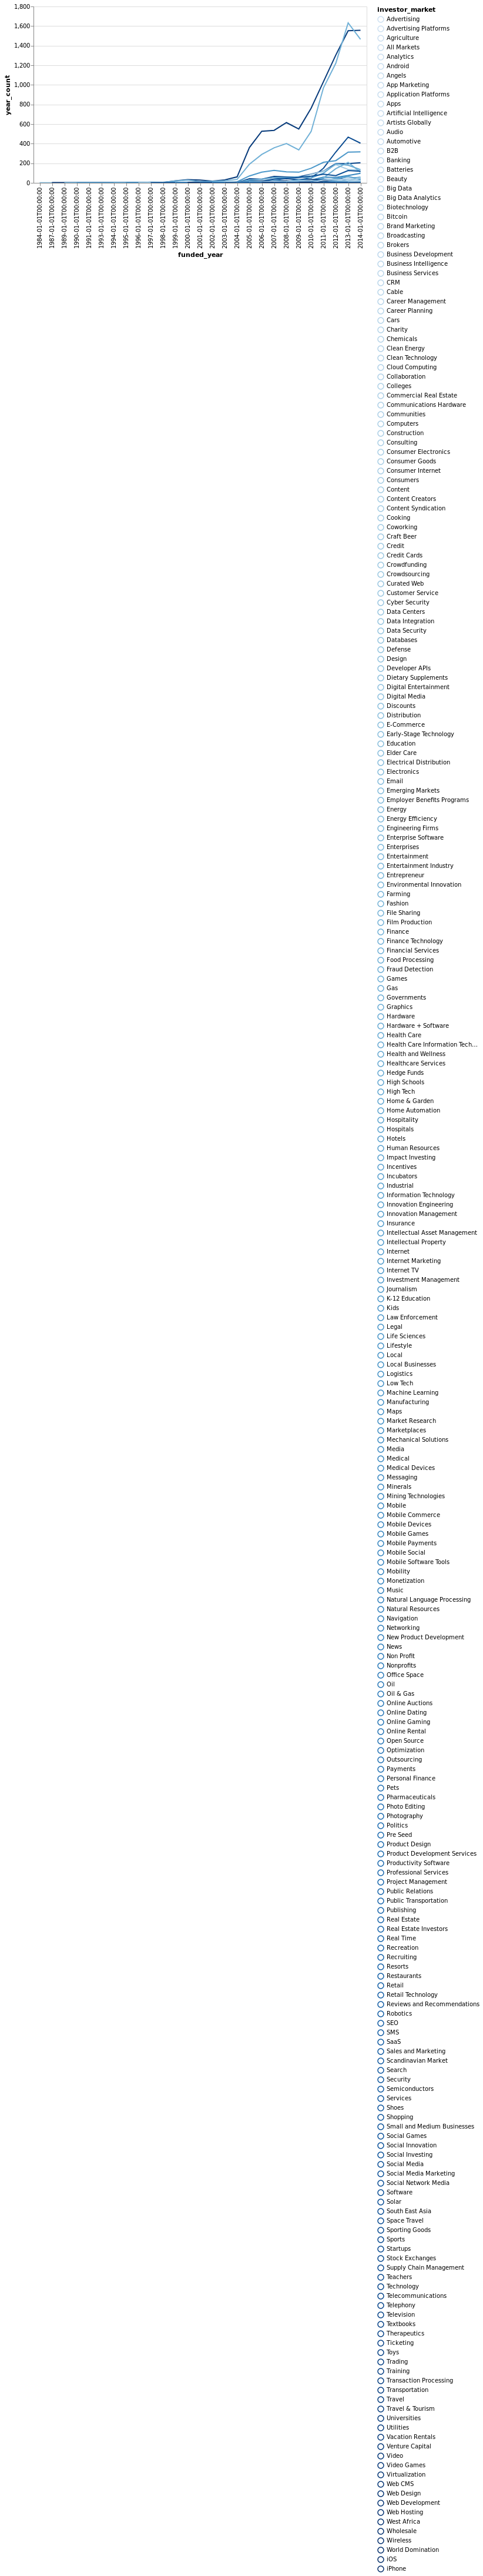

In [47]:
funding_by_date = raw_data.groupby(['funded_year','investor_market']).agg({'funded_year':'count'}).rename(columns={'funded_year':'year_count'}).reset_index()
#.loc[events_by_company['company_id']>2]
alt.Chart(funding_by_date.loc[]).mark_line().encode(
    x='funded_year:O',
    y='year_count:Q',
    color = 'investor_market:O'
)

Did you get any results? Wny not? Try to troubleshoot.

This is another problem with big datasets. Sometimes they can be sparser than they appear.

Any one particular year, especially earlier years in this dataset, may not have much representation in this dataset. One way to approach this problem, then, is to look at investor markets using larger temporal windows.

**Exercise:**
Look at money raised in different investor markets over larger windows of time. How have the investor markets changed over time? What used to be hot? Whats hot now?

Looks like some investor markets have changed, but others are very consistent!

**Exercise:**<br>
How does the investor market compare to company markets for these same windows of time?

Congratulations, smarties! You've made it to the end of this introduction to Pandas!

But this is really only where exploratory data analysis begins. The next step in EDA is data visualization. Try to come up with different data visualizations for these data. Data viz can often shed light on some surprising aspects of your data, and can inspire whole new analyses that you might not have otherwise expected.


Here are some ideas for data stories you can tell using visualizatitons:<br>
* Try plotting a time series of funding by company or investor market. 
* Which industries are receiving the most funding?<br> 
* Are there differences in the funding structures of different industries?<br>
* What is the geographical distribution of funding?<br>
* How has startup funding changed over time?<br>


But EDA is really only the jumping off point for real Data Science. The bread and butter of DS is data analysis, to which none of you are strangers. Try your hand at some analysis! Begin by importing some additional libraries. What kind of machine learning algorithms can you apply? Think carefully about why you would user one ML technique over another. This is a critical skill: companies will care about how you think about data. Your advanced degree is a big leg-up here: you've had experience thinking deeply about complex problems and the appropriaite analyses to apply to them. What can you come up with?


Here are some ideas of analyses or avenues of investigation:
* How does early round funding impact the future success of a company?
* Does goegraphical location affect the funding or future success of a company?
* How significant are the results?
* Does it qualitatively make sense?


Topics for group discussion:
* Why are your results interesting?
* Could you imagine a useful product on top of this?
* From a technical point-of-view, what was challenging about dealing with this dataset?
* What were the hardest points or roadblocks along the way?
* Are there any secondary data sources you can call upon to gain further insight?
* Where did you make wrong turns?
* What aspects of analysis did you get stuck on?
* How would you approach your workflow differently?
* Could task sharing or communication be streamlined?
